## Transfer Learning Inception V3 using Keras

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]
train_path = 'dataset/train'
valid_path = 'dataset/test'

In [3]:
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in resnet152V2.layers:
    layer.trainable = False

In [5]:

folders = glob('dataset/Train/*')

In [6]:

x = Flatten()(resnet152V2.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)


model = Model(inputs=resnet152V2.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block5_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block5_2_pad (ZeroPaddin  (None, 30, 30, 128)  0          ['conv3_block5_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv3_blo

                                                                  'conv3_block7_3_conv[0][0]']    
                                                                                                  
 conv3_block8_preact_bn (BatchN  (None, 28, 28, 512)  2048       ['conv3_block7_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv3_block8_preact_relu (Acti  (None, 28, 28, 512)  0          ['conv3_block8_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv3_block8_1_conv (Conv2D)   (None, 28, 28, 128)  65536       ['conv3_block8_preact_relu[0][0]'
                                                                 ]                                
          

 n)                                                                                               
                                                                                                  
 conv4_block2_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block2_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  589824      ['conv4_block2_2_pad[0][0]']     
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block5_preact_bn (BatchN  (None, 14, 14, 1024  4096       ['conv4_block4_out[0][0]']       
 ormalization)                  )                                                                 
                                                                                                  
 conv4_block5_preact_relu (Acti  (None, 14, 14, 1024  0          ['conv4_block5_preact_bn[0][0]'] 
 vation)                        )                                                                 
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262144      ['conv4_block5_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block7_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block7_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block7_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block7_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_blo

 conv4_block10_1_conv (Conv2D)  (None, 14, 14, 256)  262144      ['conv4_block10_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block10_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block10_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block10_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block10_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block10_2_pad (ZeroPaddi  (None, 16, 16, 256)  0          ['conv4_block10_1_relu[0][0]']   
 ng2D)    

                                                                                                  
 conv4_block12_3_conv (Conv2D)  (None, 14, 14, 1024  263168      ['conv4_block12_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block12_out (Add)        (None, 14, 14, 1024  0           ['conv4_block11_out[0][0]',      
                                )                                 'conv4_block12_3_conv[0][0]']   
                                                                                                  
 conv4_block13_preact_bn (Batch  (None, 14, 14, 1024  4096       ['conv4_block12_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_blo

 conv4_block15_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block15_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block15_2_pad (ZeroPaddi  (None, 16, 16, 256)  0          ['conv4_block15_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block15_2_conv (Conv2D)  (None, 14, 14, 256)  589824      ['conv4_block15_2_pad[0][0]']    
                                                                                                  
 conv4_block15_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block15_2_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block18_preact_bn (Batch  (None, 14, 14, 1024  4096       ['conv4_block17_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block18_preact_relu (Act  (None, 14, 14, 1024  0          ['conv4_block18_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block18_1_conv (Conv2D)  (None, 14, 14, 256)  262144      ['conv4_block18_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_blo

 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 256)  589824      ['conv4_block20_2_pad[0][0]']    
                                                                                                  
 conv4_block20_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block20_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block20_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_3_conv (Conv2D)  (None, 14, 14, 1024  263168      ['conv4_block20_2_relu[0][0]']   
                                )                                                                 
          

                                                                                                  
 conv4_block23_1_conv (Conv2D)  (None, 14, 14, 256)  262144      ['conv4_block23_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block23_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block23_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block23_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 on)                                                                                              
                                                                                                  
 conv4_block25_3_conv (Conv2D)  (None, 14, 14, 1024  263168      ['conv4_block25_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block25_out (Add)        (None, 14, 14, 1024  0           ['conv4_block24_out[0][0]',      
                                )                                 'conv4_block25_3_conv[0][0]']   
                                                                                                  
 conv4_block26_preact_bn (Batch  (None, 14, 14, 1024  4096       ['conv4_block25_out[0][0]']      
 Normalization)                 )                                                                 
          

                                                                                                  
 conv4_block28_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block28_2_pad (ZeroPaddi  (None, 16, 16, 256)  0          ['conv4_block28_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block28_2_conv (Conv2D)  (None, 14, 14, 256)  589824      ['conv4_block28_2_pad[0][0]']    
                                                                                                  
 conv4_block28_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block28_2_conv[0][0]']   
 lization)

                                )                                 'conv4_block30_3_conv[0][0]']   
                                                                                                  
 conv4_block31_preact_bn (Batch  (None, 14, 14, 1024  4096       ['conv4_block30_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block31_preact_relu (Act  (None, 14, 14, 1024  0          ['conv4_block31_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block31_1_conv (Conv2D)  (None, 14, 14, 256)  262144      ['conv4_block31_preact_relu[0][0]
                                                                 ']                               
          

                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 14, 14, 256)  589824      ['conv4_block33_2_pad[0][0]']    
                                                                                                  
 conv4_block33_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block33_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block33_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_3_conv (Conv2D)  (None, 14, 14, 1024  263168      ['conv4_block33_2_relu[0][0]']   
          

 ivation)                       )                                                                 
                                                                                                  
 conv4_block36_1_conv (Conv2D)  (None, 14, 14, 256)  262144      ['conv4_block36_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block36_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block36_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block36_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block36_1_bn[0][0]']     
 on)                                                                                              
          

 conv5_block2_2_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
          

In [9]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 721 images belonging to 4 classes.


In [12]:
test_set = test_datagen.flow_from_directory('dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 352 images belonging to 4 classes.


In [13]:
test_set

In [14]:

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=10,
  validation_steps=10
)

C:\Users\akash\AppData\Local\Temp\ipykernel_2996\3350417289.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
10/10 [==============================] - 78s 7s/step - loss: 5.9995 - accuracy: 0.5875 - val_loss: 7.4787 - val_accuracy: 0.5813
Epoch 2/20
10/10 [==============================] - 64s 7s/step - loss: 4.2359 - accuracy: 0.7607 - val_loss: 8.2626 - val_accuracy: 0.6531
Epoch 3/20
10/10 [==============================] - 60s 6s/step - loss: 2.5312 - accuracy: 0.8156 - val_loss: 6.9482 - val_accuracy: 0.6812
Epoch 4/20
10/10 [==============================] - 60s 6s/step - loss: 2.9810 - accuracy: 0.8281 - val_loss: 7.2592 - val_accuracy: 0.6750
Epoch 5/20
10/10 [==============================] - 58s 6s/step - loss: 1.5971 - accuracy: 0.8885 - val_loss: 6.6038 - val_accuracy: 0.7156
Epoch 6/20
10/10 [==============================] - 60s 6s/step - loss: 1.3290 - accuracy: 0.8938 - val_loss: 6.4442 - val_accuracy: 0.7156
Epoch 7/20
10/10 [==============================] - 60s 6s/step - loss: 1.1045 - accuracy: 0.9344 - val_loss: 8.1381 - val_accuracy: 0.6969
Epoch 8/20
10/10 [==

In [50]:
import matplotlib.pyplot as plt

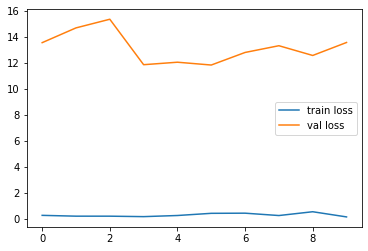

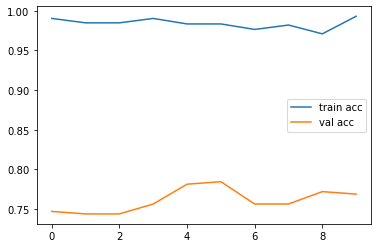

<Figure size 432x288 with 0 Axes>

In [51]:

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()

plt.show()
plt.savefig('AccVal_acc')

In [52]:
from tensorflow.keras.models import load_model
model.save('model_resnet152V2.h5')

In [53]:
y_pred = model.predict(test_set)

11/11 [==============================] - 33s 3s/step


In [54]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 5.2749111e-34, 1.0000000e+00, 9.1738347e-13],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 5.0226860e-36],
       [1.0000000e+00, 1.6747739e-23, 5.1097285e-21, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [55]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [56]:
y_pred

array([2, 1, 2, 3, 2, 3, 3, 3, 2, 1, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3,
       2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 0, 2, 2, 3, 2, 2, 3, 3, 3,
       3, 3, 2, 0, 3, 0, 2, 3, 2, 2, 3, 3, 3, 1, 3, 3, 2, 1, 0, 2, 2, 2,
       3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3, 2, 2,
       3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 0, 2, 2, 2, 3, 1, 3, 3,
       2, 3, 3, 2, 2, 2, 3, 0, 3, 1, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 3, 3, 3, 1, 3, 2, 3, 3, 0, 3, 2, 2, 0, 3, 2, 3, 2,
       2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 1, 0,
       0, 3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2,
       3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 0, 0, 3, 3, 3, 2, 2, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 0, 3, 3, 1,
       2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 0, 3,
       2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2,

In [57]:
from sklearn import metrics

In [58]:
metrics.confusion_matrix(test_set.classes, y_pred)

array([[ 0,  2,  8,  5],
       [ 0,  0,  8,  9],
       [12,  7, 71, 65],
       [10,  4, 78, 73]], dtype=int64)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(test_set.classes,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        17
           2       0.43      0.46      0.44       155
           3       0.48      0.44      0.46       165

    accuracy                           0.41       352
   macro avg       0.23      0.23      0.23       352
weighted avg       0.41      0.41      0.41       352



In [61]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [62]:
model1=load_model('model_resnet152V2.h5')

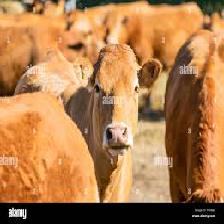

In [63]:
img=image.load_img('dataset/test/healthycows/imgs363.jpg',target_size=(224,224))
img

In [64]:
x=image.img_to_array(img)

In [65]:
x=x/255
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [66]:
model.predict(img_data)


1/1 [==============================] - 0s 155ms/step


array([[5.5405822e-09, 3.3379288e-07, 1.8791850e-03, 9.9812049e-01]],
      dtype=float32)

In [67]:
a=np.argmax(model.predict(img_data), axis=1)
a

1/1 [==============================] - 0s 152ms/step


array([3], dtype=int64)

In [68]:
a==1

array([False])

In [69]:
y_pred = model.predict(test_set)

11/11 [==============================] - 34s 3s/step


In [34]:
y_pred

array([[0.0000000e+00, 1.9835622e-38, 1.0000000e+00, 1.2502901e-33],
       [8.7190853e-33, 9.5749126e-25, 1.0000000e+00, 8.0340058e-22],
       [0.0000000e+00, 2.3684097e-34, 5.1398725e-14, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 5.7721531e-28, 1.0000000e+00],
       [0.0000000e+00, 1.5193750e-33, 2.2090789e-23, 1.0000000e+00],
       [0.0000000e+00, 4.1762843e-12, 1.0000000e+00, 1.0128421e-11]],
      dtype=float32)

In [35]:
a=np.argmax(model1.predict(img_data), axis=1)
a

1/1 [==============================] - 2s 2s/step


array([3], dtype=int64)

In [36]:
y_pred = model1.predict(test_set)

11/11 [==============================] - 35s 3s/step


In [37]:
y_pred

array([[0.0000000e+00, 1.5779208e-30, 1.0000000e+00, 4.4595203e-22],
       [0.0000000e+00, 1.0000000e+00, 2.4162152e-37, 0.0000000e+00],
       [1.0522587e-04, 9.9989462e-01, 1.8837108e-10, 9.7984476e-08],
       ...,
       [0.0000000e+00, 3.0075811e-19, 9.1224822e-04, 9.9908781e-01],
       [1.5146074e-35, 1.4067819e-18, 1.6146195e-03, 9.9838543e-01],
       [0.0000000e+00, 1.0984278e-22, 1.0000000e+00, 1.5504402e-20]],
      dtype=float32)

In [43]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  validation_steps=10
)

Epoch 1/10
23/23 [==============================] - 135s 6s/step - loss: 0.2594 - accuracy: 0.9903 - val_loss: 13.5428 - val_accuracy: 0.7469
Epoch 2/10
23/23 [==============================] - 135s 6s/step - loss: 0.1966 - accuracy: 0.9847 - val_loss: 14.6782 - val_accuracy: 0.7437
Epoch 3/10
23/23 [==============================] - 135s 6s/step - loss: 0.1956 - accuracy: 0.9847 - val_loss: 15.3436 - val_accuracy: 0.7437
Epoch 4/10
23/23 [==============================] - 134s 6s/step - loss: 0.1608 - accuracy: 0.9903 - val_loss: 11.8472 - val_accuracy: 0.7563
Epoch 5/10
23/23 [==============================] - 135s 6s/step - loss: 0.2476 - accuracy: 0.9834 - val_loss: 12.0385 - val_accuracy: 0.7812
Epoch 6/10
23/23 [==============================] - 103s 4s/step - loss: 0.4153 - accuracy: 0.9834 - val_loss: 11.8217 - val_accuracy: 0.7844
Epoch 7/10
23/23 [==============================] - 97s 4s/step - loss: 0.4265 - accuracy: 0.9764 - val_loss: 12.7890 - val_accuracy: 0.7563
Epoch 8

In [44]:
y_pred = model.predict(test_set)

11/11 [==============================] - 33s 3s/step


In [45]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 3.1006343e-06, 9.9999690e-01],
       [0.0000000e+00, 0.0000000e+00, 1.0659980e-30, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0385198e-14, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00]],
      dtype=float32)

In [70]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 3, 0, 3, 3, 0, 3, 3, 2, 2, 2, 3, 0, 3, 2,
       0, 0, 2, 2, 3, 1, 2, 3, 3, 2, 2, 3, 3, 0, 2, 2, 1, 3, 2, 2, 3, 3,
       2, 3, 3, 0, 3, 2, 0, 3, 3, 2, 2, 0, 1, 2, 3, 3, 3, 2, 3, 3, 3, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 0, 3, 2, 2, 2, 2, 1, 2, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 0, 3, 3, 2, 3, 2, 3,
       2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 1, 2, 2, 3, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 3, 2,
       2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3,
       2, 2, 3, 1, 2, 0, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 3, 1, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 2, 3,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 0, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 0, 2, 2, 2, 2, 3, 3, 2, 3,
       2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 1, 3, 2,

In [71]:
from sklearn import metrics
metrics.confusion_matrix(test_set.classes, y_pred)

array([[ 2,  0,  4,  9],
       [ 3,  1,  8,  5],
       [ 7,  6, 74, 68],
       [10,  6, 79, 70]], dtype=int64)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(test_set.classes,y_pred))

              precision    recall  f1-score   support

           0       0.09      0.13      0.11        15
           1       0.08      0.06      0.07        17
           2       0.45      0.48      0.46       155
           3       0.46      0.42      0.44       165

    accuracy                           0.42       352
   macro avg       0.27      0.27      0.27       352
weighted avg       0.42      0.42      0.42       352

